In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
file = open("iris/iris.names", "r")
file.read()

'1. Title: Iris Plants Database\n\tUpdated Sept 21 by C.Blake - Added discrepency information\n\n2. Sources:\n     (a) Creator: R.A. Fisher\n     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)\n     (c) Date: July, 1988\n\n3. Past Usage:\n   - Publications: too many to mention!!!  Here are a few.\n   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"\n      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions\n      to Mathematical Statistics" (John Wiley, NY, 1950).\n   2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.\n      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.\n   3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System\n      Structure and Classification Rule for Recognition in Partially Exposed\n      Environments".  IEEE Transactions on Pattern Analysis and Machine\n      Intelligence, Vol. PAMI-2, No. 1, 67-71.\n      -- Results:\n         -- very low misclassifi

In [11]:
df = pd.read_csv('iris/iris.data', delimiter=',', names=['sepal_length','sepal_width', 'petal_length','petal_width', 'class'])
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Problem statement
Try to predict the class of kind of iris given input of sepal and petal (length and width).

## Techinal specification
- Given sepal and petal (length and depth), predict the class of iris.  
- Case: classficiation (3 type)
- Measurement of success: Accuracy

## Methodology
1. EDA
2. Feature engineering
3. Train test split (or train validation split if there is time)
4. Measurement

### EDA
Sepal and petal is looks like normally distributed (by looking at median and mean).  
Value-nya cukup uniform (tidak ada yang melebihi order 100 kali lebih besar diantarnya) => tidak perlu standardisasi normal.  
Valuenya tidak ada yang kosong.  
Kompleksitas dataset => rendah.

<AxesSubplot: xlabel='sepal_length', ylabel='sepal_width'>

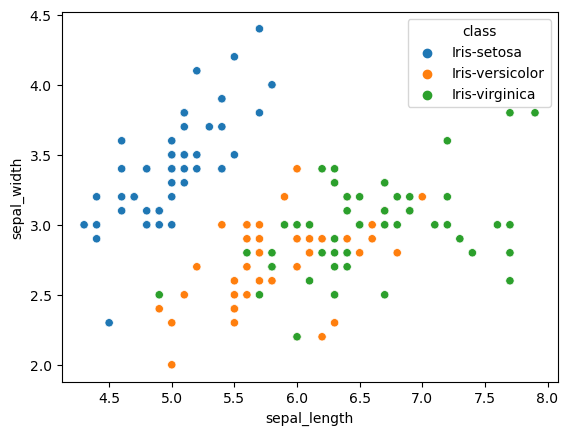

In [16]:
sns.scatterplot(df, x='sepal_length', y='sepal_width', hue='class')

<AxesSubplot: xlabel='petal_length', ylabel='petal_width'>

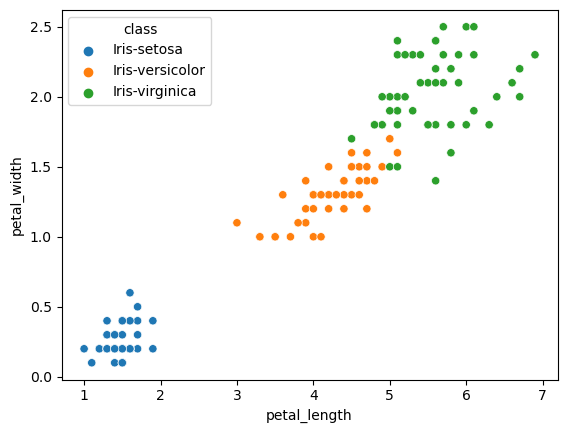

In [17]:
sns.scatterplot(df, x='petal_length', y='petal_width', hue='class')

<AxesSubplot: >

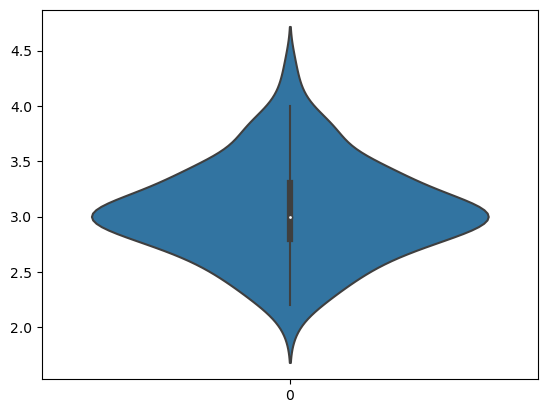

In [18]:
sns.violinplot(df['sepal_width'])

<AxesSubplot: >

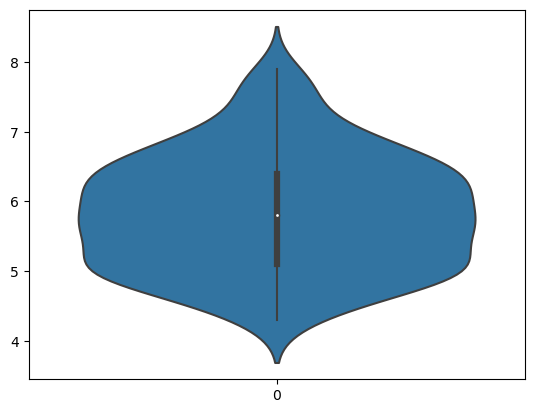

In [19]:
sns.violinplot(df['sepal_length'])

<AxesSubplot: >

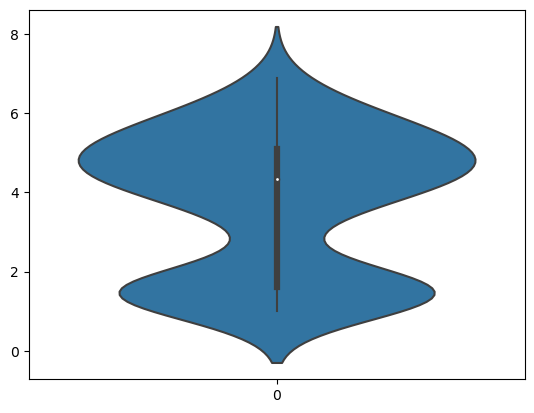

In [20]:
sns.violinplot(df['petal_length'])

In [33]:
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

<AxesSubplot: >

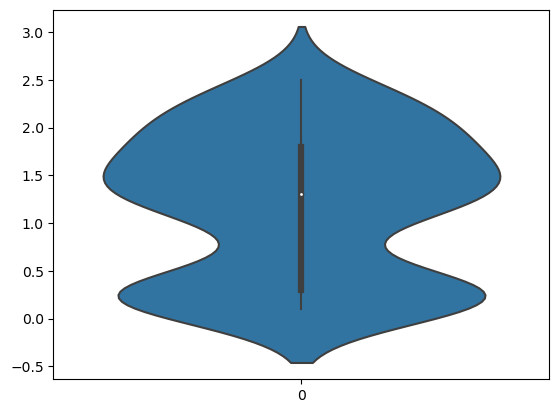

In [21]:
sns.violinplot(df['petal_width'])

### Feature engineering for baseline

None for this baseline

In [31]:
X = df.drop(columns=['class'])
y = df['class']

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
test_size = 0.25

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y)

In [42]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print(f"Accuracy for train {accuracy_score(y_train, log_reg.predict(X_train))}")
print(f"Accuracy for test {accuracy_score(y_test, log_reg.predict(X_test))}")
print(classification_report(y_test, log_reg.predict(X_test)))

Accuracy for train 0.9821428571428571
Accuracy for test 0.9210526315789473
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.92      0.85      0.88        13

       accuracy                           0.92        38
      macro avg       0.92      0.92      0.92        38
   weighted avg       0.92      0.92      0.92        38



In [43]:
### Model comparison using more sophiticated algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [51]:
def train_test_model(X_train: pd.DataFrame, X_test: pd.DataFrame, y_train: pd.DataFrame, y_test: pd.DataFrame, model) -> None:
    """Train and test the model

    Args:
        X_train (pd.DataFrame): X_train
        X_test (pd.DataFrame): X_test
        y_train (_type_): _descriy_trainption_
        y_test (pd.DataFrame): y_test
        model (_type_): model for training
    """
    model.fit(X_train, y_train)
    train_score = accuracy_score(y_train, model.predict(X_train))
    test_score = accuracy_score(y_test, model.predict(X_test))
    print(f"Accuracy for train {train_score}")
    print(f"Accuracy for test {test_score}")
    print(classification_report(y_test, model.predict(X_test)))
    if abs(train_score - test_score) < 0.1: # model is stabel
        print("Model is stable")
    else:
        print("Model is unstable. Please dont use this")

In [57]:
train_test_model(X_train, X_test, y_train, y_test, lg:=LogisticRegression())

Accuracy for train 0.9821428571428571
Accuracy for test 0.9210526315789473
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.92      0.85      0.88        13

       accuracy                           0.92        38
      macro avg       0.92      0.92      0.92        38
   weighted avg       0.92      0.92      0.92        38

Model is stable


In [52]:
train_test_model(X_train, X_test, y_train, y_test, dt:=DecisionTreeClassifier())

Accuracy for train 1.0
Accuracy for test 0.9210526315789473
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.92      0.85      0.88        13

       accuracy                           0.92        38
      macro avg       0.92      0.92      0.92        38
   weighted avg       0.92      0.92      0.92        38

Model is stable


In [53]:
train_test_model(X_train, X_test, y_train, y_test, rf:=RandomForestClassifier())

Accuracy for train 1.0
Accuracy for test 0.9210526315789473
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.92      0.85      0.88        13

       accuracy                           0.92        38
      macro avg       0.92      0.92      0.92        38
   weighted avg       0.92      0.92      0.92        38

Model is stable


In [54]:
train_test_model(X_train, X_test, y_train, y_test, xgb:=XGBClassifier())

[17:12:51] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy for train 1.0
Accuracy for test 0.9210526315789473
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.92      0.85      0.88        13

       accuracy                           0.92        38
      macro avg       0.92      0.92      0.92        38
   weighted avg       0.92      0.92      0.92        38

Model is stable


/Users/ediwijaya/miniconda3/envs/danamas/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ediwijaya/miniconda3/envs/danamas/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [55]:
train_test_model(X_train, X_test, y_train, y_test, cbc:=CatBoostClassifier())

/Users/ediwijaya/miniconda3/envs/danamas/lib/python3.9/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Learning rate set to 0.070767
0:	learn: 1.0146038	total: 57.1ms	remaining: 57s
1:	learn: 0.9504391	total: 57.4ms	remaining: 28.7s
2:	learn: 0.8924012	total: 57.7ms	remaining: 19.2s
3:	learn: 0.8395080	total: 58ms	remaining: 14.4s
4:	learn: 0.7871483	total: 58.3ms	remaining: 11.6s
5:	learn: 0.7350918	total: 58.6ms	remaining: 9.71s
6:	learn: 0.6981857	total: 58.9ms	remaining: 8.35s
7:	learn: 0.6627353	total: 59.1ms	remaining: 7.33s
8:	learn: 0.6275086	total: 59.4ms	remaining: 6.54s
9:	learn: 0.5911871	total: 59.6ms	remaining: 5.9s
10:	learn: 0.5612676	total: 59.9ms	remaining: 5.38s
11:	learn: 0.5352656	total: 60.1ms	remaining: 4.95s
12:	learn: 0.5127807	total: 60.3ms	remaining: 4.58s
13:	learn: 0.4934607	total: 60.5ms	remaining: 4.26s
14:	learn: 0.4728354	total: 60.8ms	remaining: 3.99s
15:	learn: 0.4511706	total: 61ms	remaining: 3.75s
16:	learn: 0.4310045	total: 61.3ms	remaining: 3.54s
17:	learn: 0.4126556	total: 61.5ms	remaining: 3.35s
18:	learn: 0.3937931	total: 61.7ms	remaining: 3.19s

/Users/ediwijaya/miniconda3/envs/danamas/lib/python3.9/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
/Users/ediwijaya/miniconda3/envs/danamas/lib/python3.9/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


In [56]:
train_test_model(X_train, X_test, y_train, y_test, lgb:=LGBMClassifier())

Accuracy for train 1.0
Accuracy for test 0.9210526315789473
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.92      0.85      0.88        13

       accuracy                           0.92        38
      macro avg       0.92      0.92      0.92        38
   weighted avg       0.92      0.92      0.92        38

Model is stable


In [58]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(f"Accuracy for train {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Accuracy for test {accuracy_score(y_test, rf.predict(X_test))}")
print(classification_report(y_test, rf.predict(X_test)))

Accuracy for train 1.0
Accuracy for test 0.9210526315789473
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.92      0.85      0.88        13

       accuracy                           0.92        38
      macro avg       0.92      0.92      0.92        38
   weighted avg       0.92      0.92      0.92        38

